# Speed Detection Using TensorFlow

## Imports

In [121]:
import cv2
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

import tensorflow as tf
from keras import Input
from keras.models import Sequential, load_model
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Lambda
from keras.optimizers import Adam

## Setup Data

In [51]:
#video - filename of video
#data - "test" or "train"

def VideoToImages(video,data):
    filepath = data+'/'
    vid = cv2.VideoCapture(filepath+data+".mp4")
    i=0
    success,frame = vid.read()
    images = []
    while success:
        imgname = data+str(i)+".jpg"
        images.append(filepath+imgname)
        #cv2.imwrite(filepath+imgname,frame)
        success,frame = vid.read()
        i+=1

    vid.release()
    print("done")
    return images


In [52]:
train = pd.read_table("train/train.txt",names=["speed"])
trainimages = VideoToImages("train.mp4","train")
train['images'] = trainimages
train.head()

done


,speed,images
0,28.105569,train/train0.jpg
1,28.105569,train/train1.jpg
2,28.106527,train/train2.jpg
3,28.130404,train/train3.jpg
4,28.109243,train/train4.jpg


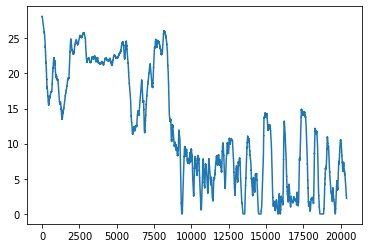

In [47]:
plt.plot(train.index,train.speed)

In [55]:
testimages = VideoToImages("test.mp4","test")
testimages[0:5]

done


['test/test0.jpg',
 'test/test1.jpg',
 'test/test2.jpg',
 'test/test3.jpg',
 'test/test4.jpg']

## Preprocessing Images

In [ ]:
def display_one(a,title1='Original'):
    plt.imshow(a)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
def display(a,b,title1='Original',title2='Edited'):
    plt.subplot(121)
    plt.imshow(a)
    plt.title(title1)
    #plt.xticks([])
    #plt.yticks([])
    plt.subplot(122)
    plt.imshow(b)
    plt.title(title2)
    #plt.xticks([])
    #plt.yticks([])
    plt.show()
    
def processing(data,h,w):
    #load image
    img = [cv2.imread(i,cv2.IMREAD_UNCHANGED) for i in data[:3]]
    #print('Original Size',img[0].shape)

    #set dims for resize
    dim = (w,h)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i],dim,interpolation=cv2.INTER_AREA)
        res_img.append(res)

    #print('Resized', res_img[0].shape)
    display(img[0],res_img[0])
    

In [ ]:
display_one(Image.open(train.images[0]))
processing(train.images,66,220)

## Model

In [119]:
def model():
    #Recreating of FlowNetC
    inputA = Input(shape=(384,512,3))
    inputB = Input(shape=(384,512,3))
    
    x = Conv2D(filters=3,kernel_size=(7.7),activation="relu")
    
    
    
    
    
    model = Sequential()
    
    model.add(Lambda(lambda x:x/127.5-1,input_shape=inputShape))
    model.add(Conv2D(filters=24,kernel_size=(5,5),strides=(2,2),activation='relu'))
    model.add(Conv2D(filters=36,kernel_size=(5,5),strides=(2,2),activation='relu'))
    model.add(Conv2D(filters=48,kernel_size=(5,5),strides=(2,2),activation='relu'))
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
    model.add(Flatten())
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(1))
    
    adam = Adam(lr=1e-4,beta_1=.9,beta_2=.999,epsilon=1e-08,decay=0.0)
    model.compile(optimizer=adam,loss='mse')
    return model
    

In [120]:
model().summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_5 (Lambda)            (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)             